In [1]:
#first import the required libraries
import numpy as np
from scipy import fftpack
import matplotlib.pyplot as plt

C:\Users\OmarAbdelgawad\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\OmarAbdelgawad\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\OmarAbdelgawad\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
#second generate your sine waves and there wil be a small noise added to the sine wave
time_step = 0.05
period = 5
time_vec = np.arange(0,10,time_step)
signal = (np.sin(2*np.pi*time_vec/period)+ 0.25*np.random.randn(time_vec.size))

In [3]:
#now we are ready to apply the fast fourier transform function to the signal
signal_fft = fftpack.fft(signal)
amplitude = np.abs(signal_fft)
sample_freq = fftpack.fftfreq(signal.size,d = time_step)

In [4]:
def truncate_freq(signal: np.ndarray)->np.ndarray:
    """Takes as input a signal in the time domain and performs first a fourier transform, finds the frequency f that
    corresponds to the maximum amplitude and then sets all frequencies higher than f to 0 as it will be considered as noise.

    Args:
        signal (np.ndarrray): time domain signal
        
    Returns:
        np.ndarray: time domain signal after filtering all frequencies higher than maximum amplitude frequency.
        """
    signal_fft = fftpack.fft(signal)
    amplitude = np.abs(signal_fft)
    sample_freq = fftpack.fftfreq(signal.size,d = time_step)
    peak_amp_ind = amplitude.argmax() #this is the indices(position) of the amplitude with the maximum amplitude
    peak_amp_freq = sample_freq[peak_amp_ind] #this is the frequency with maximum amplitude
    #now for each of the amplitudes there should be a corresponding frequency
    high_freq_fft = signal_fft.copy()
    high_freq_fft[np.abs(sample_freq) > peak_amp_freq] = 0
    filtered_signal = fftpack.ifft(high_freq_fft)
    return filtered_signal

In [5]:
filtered_signal = truncate_freq(signal)

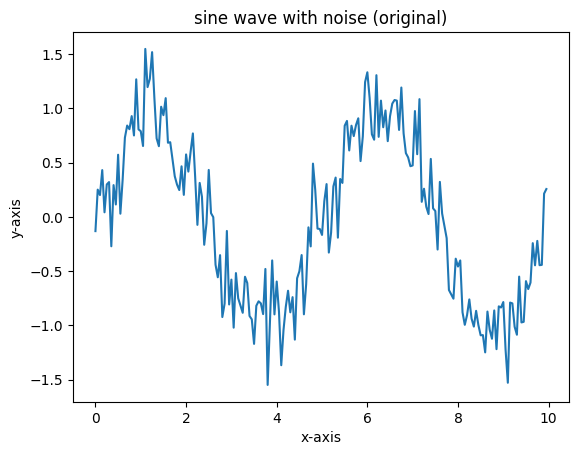

In [6]:
#original noise signal
plt.plot(time_vec,signal)
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.title("sine wave with noise (original)")
plt.show()

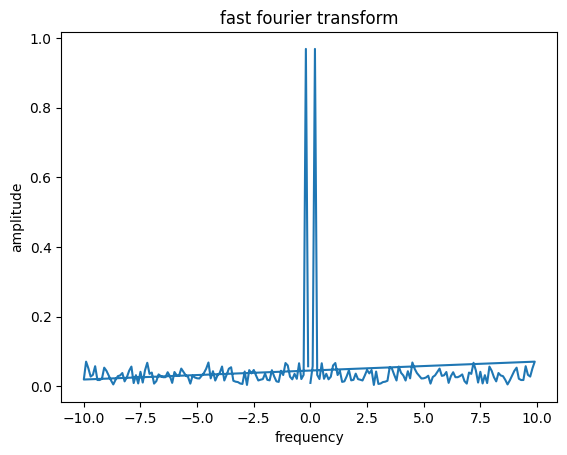

200


In [10]:
#plotting the fft graph
n = np.size(time_vec)
plt.plot(sample_freq,amplitude*2/n)
plt.xlabel("frequency")
plt.ylabel("amplitude")
plt.title("fast fourier transform")
plt.show()
print(n)

C:\Users\OmarAbdelgawad\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


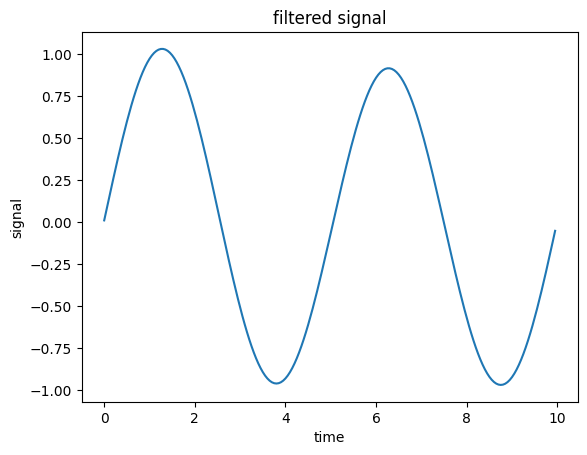

In [11]:
#plottting the filtered signal
plt.plot(time_vec,filtered_signal)
plt.xlabel("time")
plt.ylabel("signal")
plt.title("filtered signal")
plt.show()